# Core Inflation Prediction Using Machine Learning

### Objective
The objective of this project is to develop a machine learning model that predicts a country’s core inflation<br/> 
based on a range of economic indicators. This prediction will assist businesses, consumers, and government policymakers<br/> 
in anticipating changes in the economy and making proactive decisions to mitigate the impact of inflation.<br/>

Core inflation is a critical measure for understanding underlying price trends as it excludes the volatility<br/> 
of food and energy prices. By accurately forecasting core inflation, this project will help stakeholders better understand<br/> 
inflation expectations, make informed economic decisions, and plan for future economic conditions.<br/><br/>

***Why Core Inflation?***<br/>
1. Core Inflation as a Predictor of Inflation Expectations:
    - Businesses and consumers often adjust their behaviors (e.g., increasing wages, raising prices, adjusting spending)<br> 
    in response to inflation expectations. Core inflation is a reliable indicator of these expectations, as it reflects<br> 
    persistent inflation trends without the noise caused by short-term fluctuations in food and energy prices.

2. Monetary Policy Decisions:
    - Central Banks use core inflation as a key metric to set interest rates and determine monetary policy.<br/> 
    A steady or rising core inflation above a central bank's target (typically around 2%) may prompt an interest rate hike,<br> 
    whereas low core inflation may lead to lower rates to stimulate the economy.

3. Predicting Long-Term Inflation Trends:
    - Unlike headline inflation, which is influenced by volatile commodities, core inflation provides a clearer view<br/> 
    of long-term price trends, offering valuable insights for policymakers and businesses.

# Data Preprocessing

In [6]:
# Load necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# Load the dataset
inflation_df = pd.read_csv("macroeconomics.csv", sep=";")

number_of_rows, number_columns = inflation_df.shape

print("Rows: {}".format(number_of_rows))
print("Columns: {}".format(number_columns))

# Display the first rows
inflation_df.head()

Rows: 227
Columns: 16


,date,reference_rate_NBP,consumer_price_index,account_balance,avg_monthly_salary_enterprise,avg_employment_enterprise,sold_production_industry,price_index_industry,unemployment_rate,EURPLN,USDPLN,CHFPLN,WIG20,WIG,WIBOR_3M,core_inflation
0,01/01/2001,19.0,7.399,-348,9.929451,-2.538071,10.7,4.7,15.7,3.7970,4.0800,2.4696,1772.10,17602.9,18.87,6.6
1,01/02/2001,19.0,6.629,-434,7.725975,-2.389014,0.0,4.1,15.9,3.7197,4.0375,2.4113,1490.33,15471.5,18.29,6.1
2,01/03/2001,17.0,6.214,-897,7.869099,-2.599849,3.3,3.8,16.1,3.5945,4.0903,2.3485,1375.89,14698.9,17.37,5.8
3,01/04/2001,17.0,6.638,-781,5.238844,-2.735333,3.8,3.4,16.0,3.5216,3.9618,2.2842,1441.03,15269.0,17.15,6.0
4,01/05/2001,17.0,6.943,-658,8.828234,-2.966742,-0.4,2.3,15.9,3.3723,3.9824,2.2187,1467.89,15630.3,17.16,6.5


### Variables
The data set includes the following variables:

- date: from January of 2001 to November of 2019.

- reference_rate_NBP: the reference rate of the Central Bank of Poland.
- consumer_price_index: the Consumer Price Index of Poland.
- account_balance: current account balance of Poland in million euros.
- avg_monthly_salary_enterprise: average monthly gross nominal salary in the enterprise sector (growth rate).
- avg_employment_enterprise: average employment in the enterprise sector (growth rate).
- sold_production_industry: total sold production of industry (growth rate).
- price_index_industry: price index of sold production in the industry (growth rate).
- unemployment_rate: registered unemployment rate at the end of the month.
- EURPLN: monthly average of daily closing levels of 1 euro to zloty.
- USDPLN: monthly average of daily closing levels of 1 US dollar to zloty.
- CHFPLN: monthly average of daily closing levels of 1 Swiss franc to zloty.
- WIG20: monthly average of stock market index of the twenty largest companies on the Warsaw Stock Exchange.
- WIG: monthly average of the Warsaw Stock Index.
- WIBOR 3M: monthly average of the Warsaw Interbank Offered Rate.
- core_inflation: inflation excluding food and energy prices.

### Data types

In [8]:
data_types = inflation_df.dtypes
print("\nData Types:\n", data_types)


Data Types:
 date                              object
reference_rate_NBP               float64
consumer_price_index             float64
account_balance                   object
avg_monthly_salary_enterprise    float64
avg_employment_enterprise        float64
sold_production_industry         float64
price_index_industry             float64
unemployment_rate                float64
EURPLN                           float64
USDPLN                           float64
CHFPLN                           float64
WIG20                            float64
WIG                              float64
WIBOR_3M                         float64
core_inflation                   float64
dtype: object


### Converting datatypes

In [9]:
# Remove commas from 'account_balance' if present and convert it to a numeric type
inflation_df["account_balance"] = inflation_df["account_balance"].replace({",": ""}, regex=True).astype(float)

### Remove irrelevant columns: "Date"

In [10]:
# Remove the 'date' column
inflation_df = inflation_df.drop(columns=["date"])

### Statistics

In [11]:
# Generate summary statistics and round them
summary_stats = inflation_df.describe().round(2)

# Convert the summary statistics into a DataFrame
summary_stats_df = pd.DataFrame(summary_stats)

# Display the resulting DataFrame
summary_stats_df

,reference_rate_NBP,consumer_price_index,account_balance,avg_monthly_salary_enterprise,avg_employment_enterprise,sold_production_industry,price_index_industry,unemployment_rate,EURPLN,USDPLN,CHFPLN,WIG20,WIG,WIBOR_3M,core_inflation
count,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00
mean,4.42,2.15,-780.27,4.98,1.04,5.68,1.94,12.80,4.11,3.41,3.12,2214.76,41225.06,4.68,1.56
std,3.27,1.80,873.69,2.52,2.79,6.64,2.79,4.26,0.30,0.50,0.59,594.52,15352.94,3.30,1.36
min,1.50,-1.60,-3510.00,-0.02,-4.97,-15.30,-2.80,5.00,3.21,2.06,1.97,1022.62,11890.60,1.65,-0.40
25%,1.75,0.80,-1323.00,3.30,-0.80,1.65,-0.15,9.90,3.94,3.07,2.60,1804.76,27781.30,1.77,0.70
50%,4.00,2.00,-734.00,4.40,1.39,5.60,1.90,12.40,4.15,3.36,3.06,2286.53,44748.53,4.20,1.20
75%,5.25,3.57,-249.50,6.50,3.20,9.25,3.40,16.25,4.29,3.83,3.63,2494.18,52999.00,5.57,2.30
max,19.00,7.40,2581.00,13.20,5.80,30.00,9.60,20.70,4.89,4.26,4.13,3877.62,66077.70,18.87,6.60


### Missing data analysis

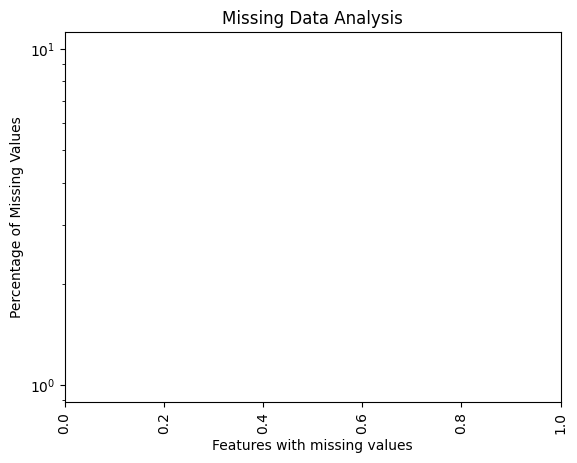

In [12]:
# Find Missing Data
missing_data = inflation_df.isnull().sum()
missing_data_percentage = (missing_data / inflation_df.shape[0]) * 100

# Create a dataframe using the two arrays
missing_data_df = pd.DataFrame({
    "Missing Data": missing_data,
    "Missing Percentage": missing_data_percentage
    }, index=inflation_df.columns)

# Filter to include only rows with non-zero missing data and drop any None/Nan labels
missing_data_df_filtered = missing_data_df[missing_data_df["Missing Data"] > 0].dropna()

# Visualize the missing data using a bar ploat with log scale for better visualization
ax = sns.barplot(x=missing_data_df_filtered.index, y=missing_data_df_filtered["Missing Data"])

# Add the number of missing values on tpp of each bar
for i, value in enumerate(missing_data_df_filtered["Missing Data"]):
    ax.text(i, missing_data_df_filtered["Missing Data"].iloc[i],
            f"{int(value)}", ha="center", va="bottom")

# Customize the plot
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Data Analysis")
ax.set_xlabel("Features with missing values")
ax.tick_params(axis="x", rotation=90)
ax.set_yscale("log")

***There is no missing data.***

### Outliers detection: IQR Method

In [13]:
def detect_outliers_iqr(df, column):
    """
    Detect outliers in a column using the IQR method.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column to check for outliers.
    
    Returns:
    DataFrame: A DataFrame containing the outliers for that column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    lower_outliers = df[df[column] < lower_bound]
    upper_outliers = df[df[column] > upper_bound]
    # outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers = pd.concat([lower_outliers, upper_outliers], axis=0)
    
    return outliers, lower_outliers, upper_outliers, lower_bound, upper_bound


# Select all numerical columns from the DataFrame
numerical_columns = inflation_df.select_dtypes(include=["float64", "int64"]).columns

# Detect outliers for each numerical column
outliers_dict = {}
for col in numerical_columns:
    outliers, *_ = detect_outliers_iqr(inflation_df, col)
    if not outliers.empty:  # Only store columns with outliers
        outliers_dict[col] = outliers

# Display the outliers for each numerical column
if outliers_dict:
    print("Using IQR Rule we found outliers in:")
    for col, outliers in outliers_dict.items():
        print(f"  '{col}': {len(outliers)} entries")
else:
    print("No outliers detected in any numerical columns.")


Using IQR Rule we found outliers in:
  'reference_rate_NBP': 12 entries
  'account_balance': 5 entries
  'avg_monthly_salary_enterprise': 6 entries
  'sold_production_industry': 10 entries
  'price_index_industry': 5 entries
  'EURPLN': 9 entries
  'WIG20': 8 entries
  'WIBOR_3M': 12 entries
  'core_inflation': 10 entries


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be remo

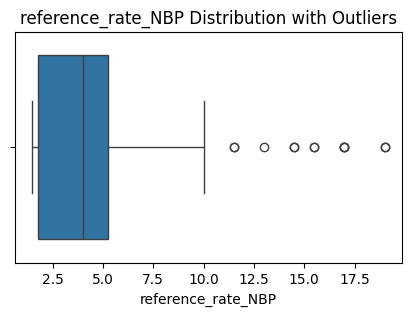

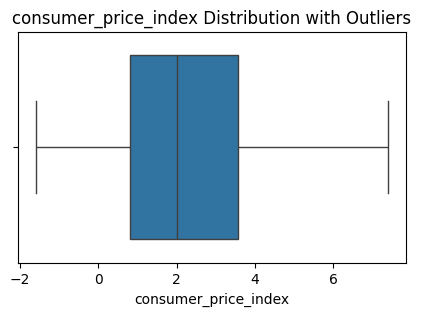

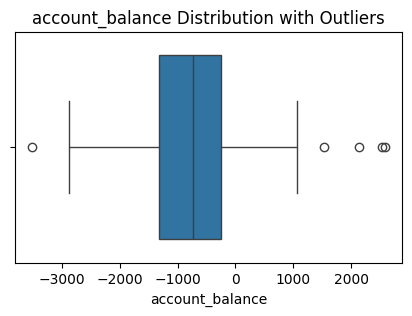

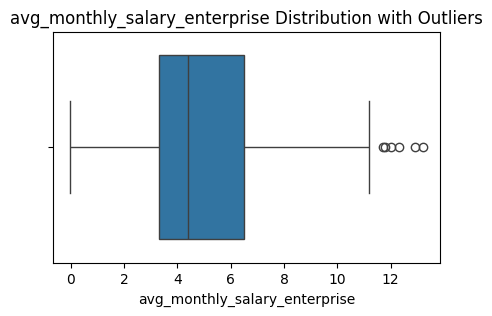

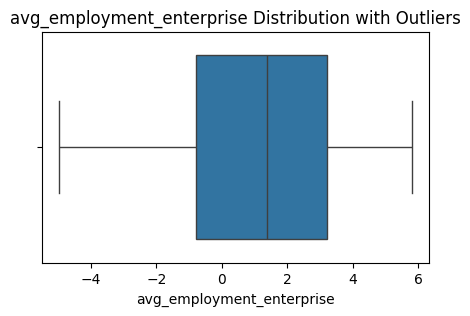

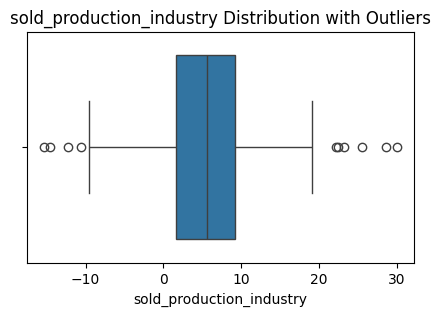

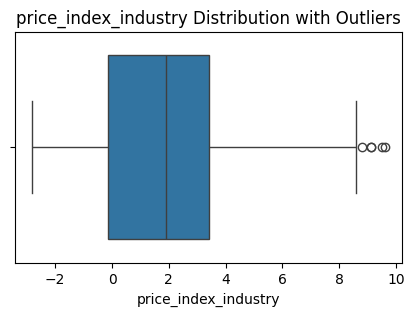

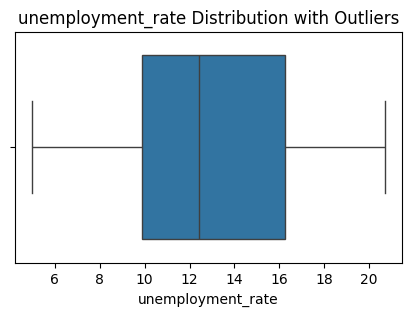

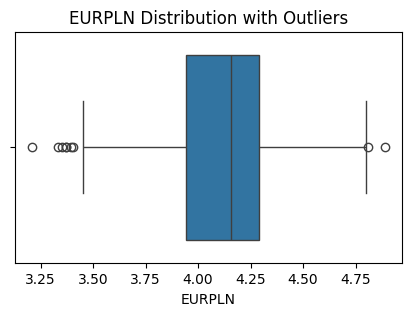

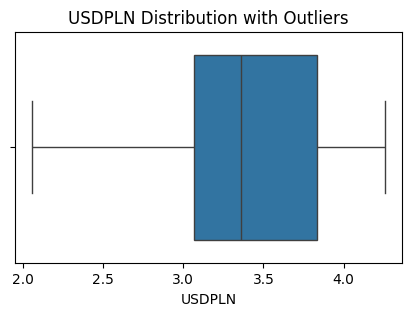

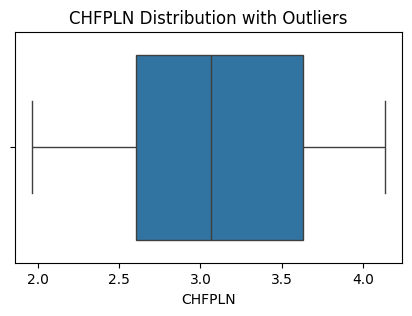

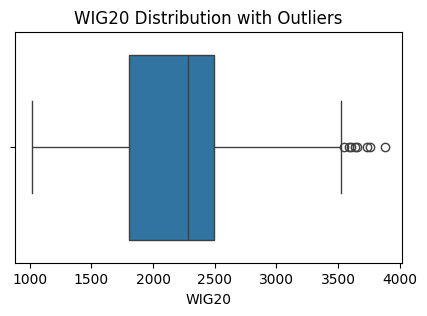

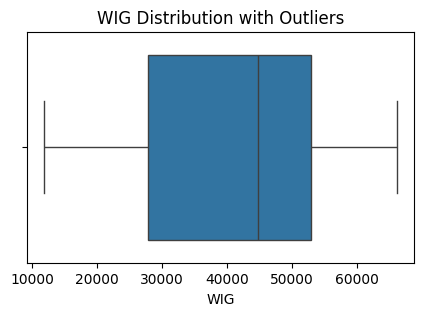

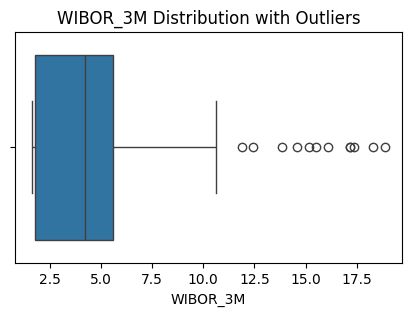

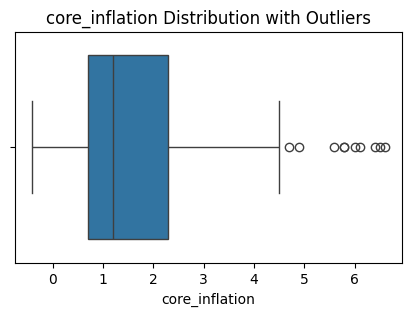

In [14]:
# Visualize outliers for each numerical column using boxplots
for col in numerical_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=inflation_df[col])
    plt.title(f'{col} Distribution with Outliers')

### An alternative method to detect outliers: the 3 sigma rule (Z score).

In [15]:
def detect_outliers_n_sigma_rule(df, column, n=3):
    """
    Detect outliers using the n sigma rule (Z-score method).
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column to check for outliers.
    threshold (float): The Z-score threshold for defining outliers (default is 3).
    
    Returns:
    DataFrame: A DataFrame containing the outliers.
    """
    mean_col = np.mean(df[column])
    std_col = np.std(df[column])
    
    # Calculate the Z-scores
    z_scores = (df[column] - mean_col) / std_col
    
    # Find outliers based on the threshold
    outliers = df[np.abs(z_scores) > n]
    
    return outliers

# Apply 3 sigma rule method for outlier detection in all numerical columns
outliers_zscore_dict = {}
for col in numerical_columns:
    outliers = detect_outliers_n_sigma_rule(inflation_df, col, n=3)
    if not outliers.empty:
        outliers_zscore_dict[col] = outliers

# Display the Z-Score based outliers
if outliers_zscore_dict:
    for col, outliers in outliers_zscore_dict.items():
        print(f"Outliers detected in '{col}' using the 3 Sigma Rule: {len(outliers)} entries.")
else:
    print("No outliers detected using Z-Score.")

Outliers detected in 'reference_rate_NBP' using the 3 Sigma Rule: 9 entries.
Outliers detected in 'account_balance' using the 3 Sigma Rule: 4 entries.
Outliers detected in 'avg_monthly_salary_enterprise' using the 3 Sigma Rule: 2 entries.
Outliers detected in 'sold_production_industry' using the 3 Sigma Rule: 4 entries.
Outliers detected in 'EURPLN' using the 3 Sigma Rule: 1 entries.
Outliers detected in 'WIBOR_3M' using the 3 Sigma Rule: 9 entries.
Outliers detected in 'core_inflation' using the 3 Sigma Rule: 7 entries.


***Better, but we still have some outliers.***

***However, there is no big difference between the outliers and the lower bound (Q1 - 1.5 * IQR) and the upper bound (Q3 + 1.5 * IQR).<br/>
Moreover, the size of the dataset is quite small; Thus, we would leave them as is.***

### Data Transformation: Standardize the Data

In [16]:
# Select all numerical columns from the DataFrame
numerical_columns = inflation_df.select_dtypes(include=["float64", "int64"]).columns

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()

# Create a copy of the original dataframe
inflation_df_scaled = inflation_df.copy()

inflation_df_scaled.loc[:, numerical_columns] = scaler.fit_transform(inflation_df[numerical_columns])
inflation_df_scaled.head()

,reference_rate_NBP,consumer_price_index,account_balance,avg_monthly_salary_enterprise,avg_employment_enterprise,sold_production_industry,price_index_industry,unemployment_rate,EURPLN,USDPLN,CHFPLN,WIG20,WIG,WIBOR_3M,core_inflation
0,4.46696,2.919519,0.495853,1.968208,-1.284724,0.758269,0.988093,0.681579,-1.042046,1.346308,-1.105823,-0.746222,-1.542009,4.313675,3.719256
1,4.46696,2.491331,0.397203,1.091539,-1.231187,-0.856475,0.772940,0.728635,-1.301665,1.261064,-1.205172,-1.221216,-1.681142,4.137332,3.350643
2,3.85441,2.260555,-0.133902,1.148482,-1.306912,-0.358470,0.665363,0.775690,-1.722161,1.366968,-1.312190,-1.414134,-1.731576,3.857615,3.129475
3,3.85441,2.496336,-0.000839,0.102017,-1.355574,-0.283015,0.521928,0.752162,-1.967002,1.109228,-1.421764,-1.304324,-1.694361,3.790726,3.276921
4,3.85441,2.665943,0.140254,1.530081,-1.438688,-0.916839,0.127481,0.728635,-2.468439,1.150547,-1.533383,-1.259045,-1.670776,3.793766,3.645534


# Exploratory Data Analysis (EDA)

### Histograms

In [17]:
# Ensure only true numerical columns are included
numeric_data = inflation_df.select_dtypes(include=["number"])

numeric_data.columns

Index(['reference_rate_NBP', 'consumer_price_index', 'account_balance',
       'avg_monthly_salary_enterprise', 'avg_employment_enterprise',
       'sold_production_industry', 'price_index_industry', 'unemployment_rate',
       'EURPLN', 'USDPLN', 'CHFPLN', 'WIG20', 'WIG', 'WIBOR_3M',
       'core_inflation'],
      dtype='object')

Text(0.5, 0.98, 'histograms')

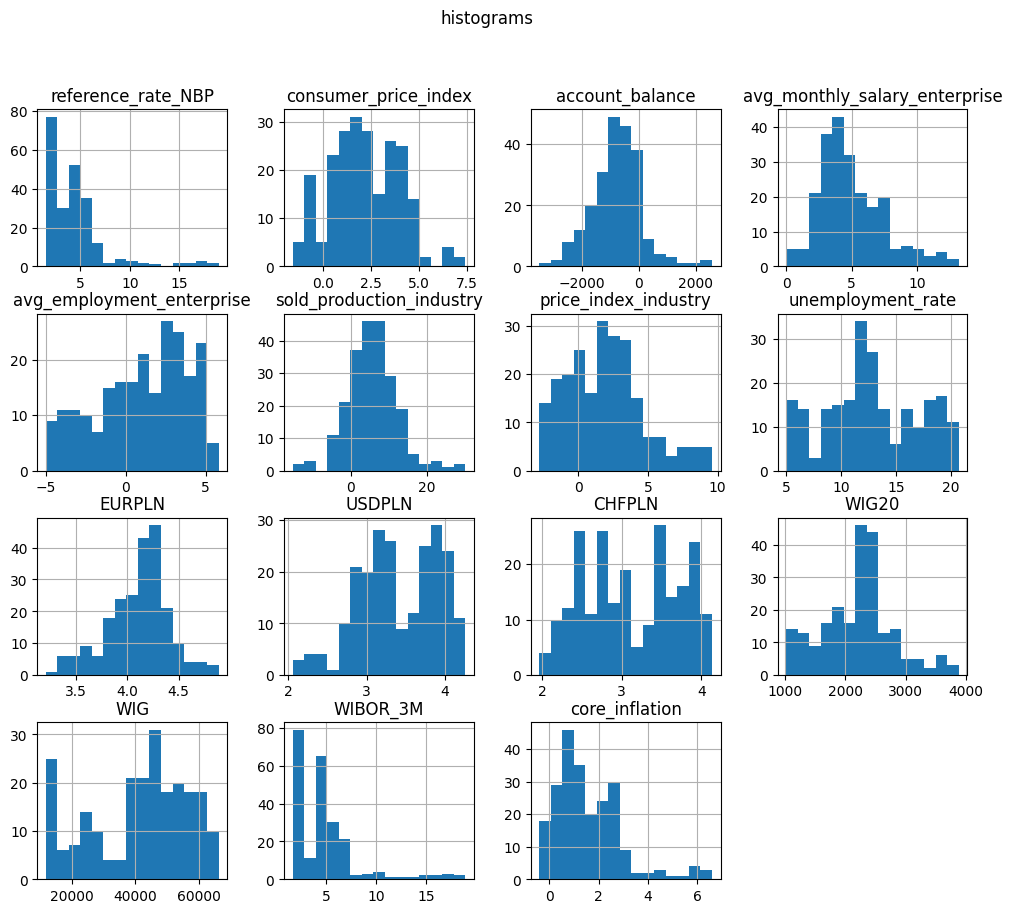

In [18]:
# Histograms
numeric_data.hist(figsize=(12, 10), bins=15)
plt.suptitle("histograms")

### Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix Heatmpa')

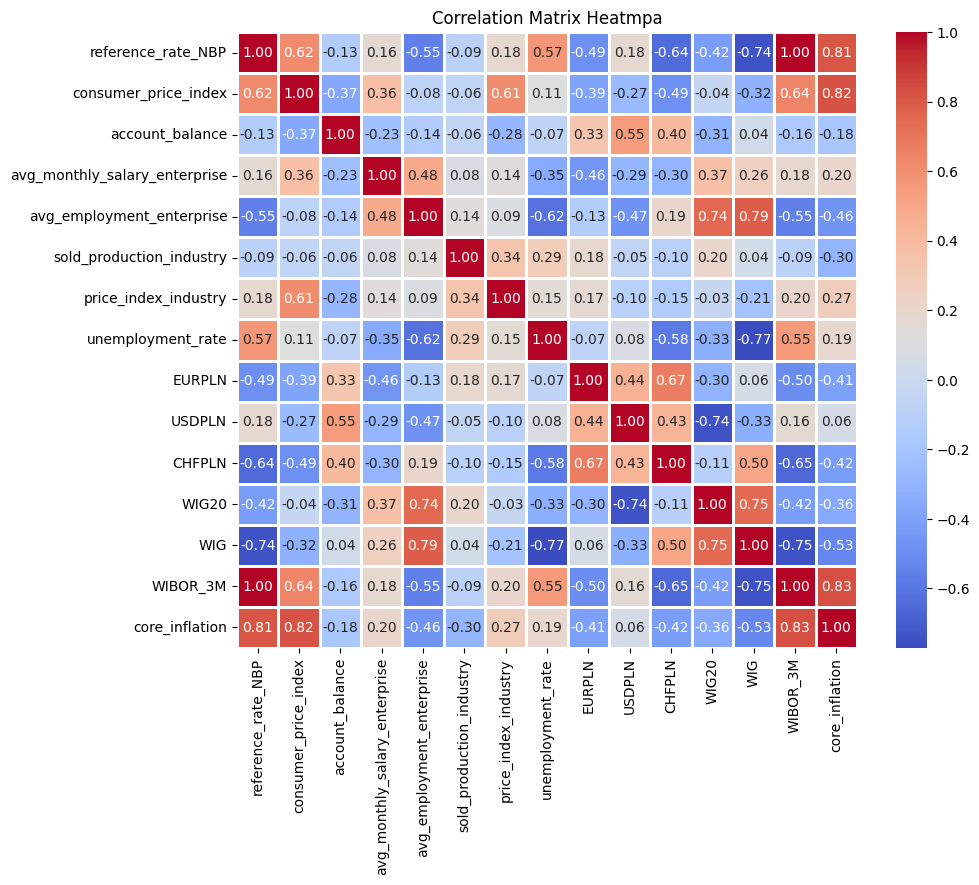

In [19]:
# Calculate and visualize the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Matrix Heatmpa")

In [20]:
# Get correlations with the target column
target_corr = corr_matrix["core_inflation"].abs().sort_values(ascending=False)
    
# Select features with correlation above the threshold
relevant_features = target_corr[target_corr > 0.7].index.tolist()
    
# Remove the target column from the list of relevant features (if needed)
relevant_features.remove("core_inflation")

# Create DataFrames for relevant features.
relevant_features_df = pd.DataFrame({"Relevant Features (target_corr > 0.7)": relevant_features})

relevant_features_df

,Relevant Features (target_corr > 0.7)
0,WIBOR_3M
1,consumer_price_index
2,reference_rate_NBP


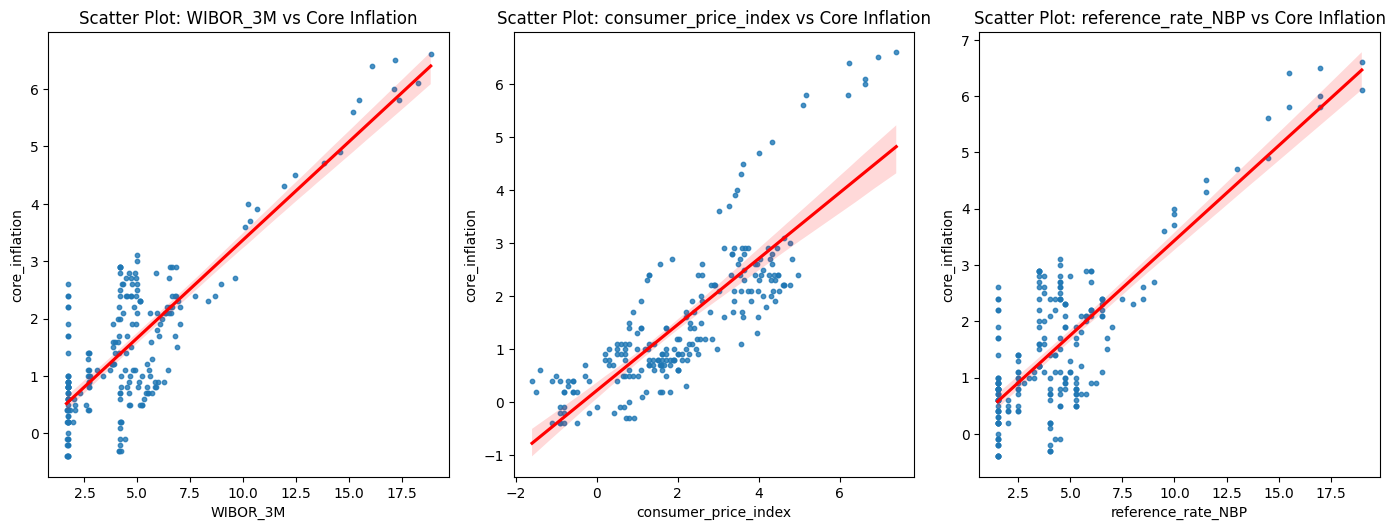

In [21]:
# Set up the matplotlib figure for scatter plots with regression lines
plt.figure(figsize=(14, 10))

# Create scatter plots with regression lines for core_inflation vs top features
for i, feature in enumerate(relevant_features, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=inflation_df[feature], y=inflation_df["core_inflation"], scatter_kws={"s": 10}, line_kws={"color": "red"})
    plt.title(f"Scatter Plot: {feature} vs Core Inflation")

plt.tight_layout()
plt.show()

# Features Selection: Random Forest Vs. XGBoost

In [22]:
# Define features (X) and targets (y)
X = inflation_df_scaled.drop(columns=["core_inflation"])
y = inflation_df_scaled["core_inflation"]

### Random Forest

In [23]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances from Random Forest
rf_feature_importances = rf_model.feature_importances_

### XGBoost

In [24]:
# Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# Get feature importances from XGBoost
xgb_feature_importances = xgb_model.feature_importances_

### DataFrames for feature importance of both models – Random Forest & XGBoost

In [25]:
# Create DataFrames for feature importances from both models
rf_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Random Forest Importance": rf_feature_importances
})

xgb_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "XGBoost Importance": xgb_feature_importances
})

# Merge the two DataFrames to compare the feature importances
importance_comparison_df = pd.merge(rf_importance_df, xgb_importance_df, on="Feature")

# Sort by Random Forest importance
importance_comparison_df = importance_comparison_df.sort_values(by="Random Forest Importance", ascending=False)

# Display the comparison of feature importances
importance_comparison_df

,Feature,Random Forest Importance,XGBoost Importance
1,consumer_price_index,0.439602,0.250501
13,WIBOR_3M,0.248015,0.051511
0,reference_rate_NBP,0.160135,0.559198
4,avg_employment_enterprise,0.036966,0.013502
12,WIG,0.033866,0.034307
7,unemployment_rate,0.021912,0.015708
10,CHFPLN,0.016622,0.029988
11,WIG20,0.015126,0.020736
6,price_index_industry,0.006694,0.003604
9,USDPLN,0.005524,0.007595


***According to the correlation analysis, Random Frorest and XGBoost importance metric,<br/>
<u>consumer_price_index</u>, <u>WIBOR_3M</u> and <u>reference_rate_NBP</u> are the most<br/> 
important features. However, all these features have an importance score ≤ 0.5.<br/> 
Thus, we will continue our investigation using all the functionalities.***

### Dataset with only important features

In [26]:
# Dataset with only important features and target(core_inflation)
"""inflation_df_scaled = inflation_df_scaled[relevant_features + ["core_inflation"]]"""

# Define features (X) and targets (y)
"""X = inflation_df_scaled.drop(columns=["core_inflation"])"""
"""y = inflation_df_scaled["core_inflation"]"""

'y = inflation_df_scaled["core_inflation"]'

# Model Selection

### Model Training and First Evaluation:

Train the following models:
- Linear Regression
- Random Forest
- XGBoost
- Neural Networks

on the training set and evaluate them using the *mean_absolute_error*(MAE), *mean_squared_error*(MSE), *r2_score*(R²) metrics.

In [27]:
# Splits the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

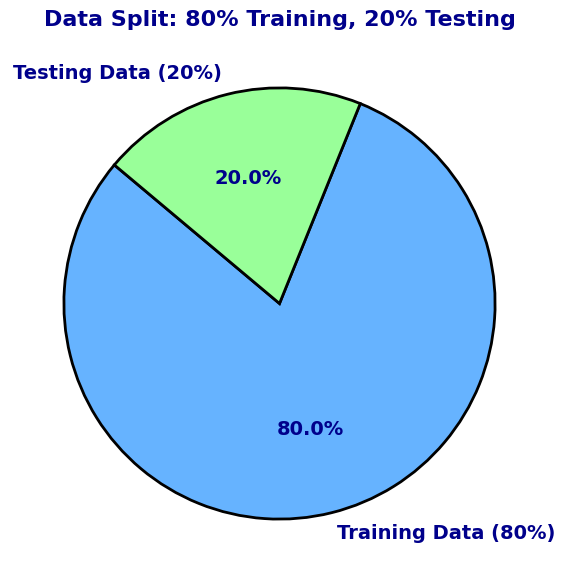

In [45]:
# Data for the pie chart
labels = ['Training Data (80%)', 'Testing Data (20%)']
sizes = [80, 20]
colors = ['#66b3ff', '#99ff99']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'linestyle': 'solid'},
        textprops={'fontsize': 14, 'fontweight': 'bold', 'color': 'darkblue'})

# Title with a more visually appealing style
plt.title("Data Split: 80% Training, 20% Testing", fontsize=16, fontweight='bold', color='darkblue')

# Show the plot
plt.show()


In [ ]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Neural Networks": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Train the models and evaluate them
results_train = {}
results_test = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    """Prediction"""
    # Make prediction on the training set
    y_train_pred = model.predict(X_train)
    
    # Make predictions on the test set
    y_test_pred = model.predict(X_test)
    
    
    """Evaluation Metrics"""
    # Calculate evaluation metrics using training set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Calculate evaluation metrics using testing set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    
    """Results"""
    # Store the results_train
    results_train[model_name] = {
        "MAE": mae_train,
        "MSE": mse_train,
        "R²": r2_train
    }
    
    # Store the results_test
    results_test[model_name] = {
        "MAE": mae_test,
        "MSE": mse_test,
        "R²": r2_test
    }


# Display the results
results_train_df = pd.DataFrame(results_train).T
results_test_df = pd.DataFrame(results_test).T

print("Training Performance")
results_train_df

,MAE,MSE,R²
Linear Regression,0.168381,4.696996e-02,0.957955
Random Forest,0.055512,5.100005e-03,0.995435
XGBoost,0.000609,6.851113e-07,0.999999
Neural Networks,0.124683,2.487587e-02,0.977732


In [ ]:
print("Testing Performance")
results_test_df

,MAE,MSE,R²
Linear Regression,0.173528,0.054566,0.898691
Random Forest,0.173168,0.058364,0.891639
XGBoost,0.178116,0.060585,0.887516
Neural Networks,0.147938,0.032125,0.940356


### Hyperparameter Tuning with GridSearchCV

In [31]:
# Define hyperparameter grids for models
param_grid_lr = {
    'fit_intercept': [True, False],
}

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

param_grid_nn = {
    "hidden_layer_sizes": [(50,), (100,), (200,)],
    "activation": ["relu", "tanh"],
    "max_iter": [500, 1000],
    "learning_rate": ["constant", "adaptive"]
}

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
nn = MLPRegressor(random_state=42)

# Perform GridSearchCV for Linear Regression
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring="neg_mean_squared_error", n_jobs=1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring="neg_mean_squared_error", n_jobs=1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Perform GridSearchCV for Neural Networks
grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=5, scoring="neg_mean_squared_error", n_jobs=1, verbose=2)
grid_search_nn.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_es

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

### Get the best parameters for each model

In [32]:
# Get the best parameters and scores for each model
lr_best_params = grid_search_lr.best_params_
rf_best_params = grid_search_rf.best_params_
xgb_best_params = grid_search_xgb.best_params_
nn_best_params = grid_search_nn.best_params_

# Create a summary DataFrame
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "Neural Networks"],
    "Best Parameters": [lr_best_params, rf_best_params, xgb_best_params, nn_best_params],
})

# Display the results
results

,Model,Best Parameters
0,Linear Regression,{'fit_intercept': False}
1,Random Forest,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
2,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."
3,Neural Networks,"{'activation': 'relu', 'hidden_layer_sizes': (..."


### Get the best models and hyperparameters

In [33]:
# Get the best models and hyperparameters
best_lr = grid_search_lr.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_nn = grid_search_nn.best_estimator_

### Train the models on the training set using the best hyperparameters – Make predictions on the test set – Evaluate the models using MAE, MSE, and R²

In [ ]:
# Train the models on the training set using the best hyperparameters
best_lr.fit(X_train, y_train)
best_rf.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)
best_nn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_nn = best_nn.predict(X_test)

# Evaluate the models using MAE, MSE, and R²
results = {
    "Linear Regression": {
        'MAE': mean_absolute_error(y_test, y_pred_lr),
        'MSE': mean_squared_error(y_test, y_pred_lr),
        'R²': r2_score(y_test, y_pred_lr),
    },
    
    "Random Forest": {
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'MSE': mean_squared_error(y_test, y_pred_rf),
        'R²': r2_score(y_test, y_pred_rf)
    },
    "XGBoost": {
        'MAE': mean_absolute_error(y_test, y_pred_xgb),
        'MSE': mean_squared_error(y_test, y_pred_xgb),
        'R²': r2_score(y_test, y_pred_xgb)
    },
    "Neural Networks": {
        'MAE': mean_absolute_error(y_test, y_pred_nn),
        'MSE': mean_squared_error(y_test, y_pred_nn),
        'R²': r2_score(y_test, y_pred_nn)
    }
}

# Display the results in a DataFrame
results_df = pd.DataFrame(results).T

results_df

,MAE,MSE,R²
Linear Regression,0.173297,0.054540,0.898739
Random Forest,0.175754,0.059550,0.889438
XGBoost,0.154700,0.043106,0.919968
Neural Networks,0.146262,0.031271,0.941942


### Cross Validation: Performance and Generalization ability of models.

In [35]:
# Define the models
models = {
    'Linear Regression': best_lr,
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'Neural Networks': best_nn
}

# Initialize an empty dictionary to store the results
results = {}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    # Perform cross-validation and calculate the negative mean squared error (since scoring is a maximization)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate the mean and standard deviation of the MSE
    mean_mse = np.mean(-cv_scores)  # Negative because cross_val_score returns negative MSE
    std_mse = np.std(-cv_scores)

    # Store results
    results[model_name] = {
        'Mean MSE': mean_mse,
        'Std MSE': std_mse,
        'Mean MAE': np.mean(np.abs(cv_scores)),
        'R²': np.mean(cross_val_score(model, X, y, cv=5, scoring='r2'))
    }

# Display the results in a DataFrame
results_df = pd.DataFrame(results).T

results_df

,Mean MSE,Std MSE,Mean MAE,R²
Linear Regression,0.131709,0.027730,0.131709,0.577717
Random Forest,0.578292,0.679822,0.578292,0.097563
XGBoost,0.633995,0.738651,0.633995,0.016694
Neural Networks,0.167219,0.087030,0.167219,0.559731


***The significant drop in evaluation metric values ​​is due to the size of the initial dataset for two main reasons:***
- In k-fold cross-validation, the dataset is split into k subsets, with each subset used for testing once while<br/>
 the remaining k−1 subsets are used for training. With a small dataset, the subsets are small as well, which means<br/> 
 the performance on each fold can vary significantly. This leads to higher variance in the final performance estimate,<br/> 
 making the model's evaluation less stable.

- A small dataset often means less diverse data, and if the model is complex, it may overfit to the small training subsets,<br/> 
leading to overly optimistic performance estimates in some folds and underperforming in others. Overfitting can be more pronounced<br/> 
when the data size is small because the model has fewer examples to learn from and may memorize the training data rather than<br/> generalizing well.

# Solution
To address the problem we will use bootstrapping and noise injection to augment our dataset<br/>
then repeat all the model selection steps.

- Bootstrapping: This technique involves randomly sampling your dataset with replacement, which allows the creation of new data points that are similar to the original data.

- Noise Injection: Add Gaussian noise (with mean = 0 and standard deviation = noise_level) to each numerical column in the dataset to simulate small variations that would exist in real-world data.

### Data Augmentation: Bootstrapping and Noise injection

In [36]:
# Example: Bootstrapping to create a larger dataset
n_original = len(inflation_df)
n_augmented = n_original * 24  # Increse the size of the dataset

# Bootstrapping the original dataset
inflation_augmented_df = resample(inflation_df, n_samples=n_augmented, random_state=42)

# Add noise to features for augmentation (Gaussian noise)
noise_level = 0.01  # Adjust the noise level
inflation_augmented_df_with_noise = inflation_augmented_df.copy()

# Add noise to numerical columns
for column in inflation_augmented_df.select_dtypes(include=[np.number]).columns:
    noise = np.random.normal(0, noise_level, inflation_augmented_df_with_noise[column].shape)
    inflation_augmented_df_with_noise[column] += noise

# Now the augmented_data_with_noise contains more entries with small variations
print("New shape:")
inflation_augmented_df_with_noise.shape

New shape:


(5448, 15)

### Data Transformation: Standardize the Data

In [37]:
# Select all numerical columns from the DataFrame
numerical_columns = inflation_augmented_df_with_noise.select_dtypes(include=["float64", "int64"]).columns

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()

# Create a copy of the augmented_data_with_noise dataframe
inflation_df_scaled = inflation_augmented_df_with_noise.copy()

inflation_df_scaled.loc[:, numerical_columns] = scaler.fit_transform(inflation_augmented_df_with_noise[numerical_columns])
inflation_df_scaled.head()

,reference_rate_NBP,consumer_price_index,account_balance,avg_monthly_salary_enterprise,avg_employment_enterprise,sold_production_industry,price_index_industry,unemployment_rate,EURPLN,USDPLN,CHFPLN,WIG20,WIG,WIBOR_3M,core_inflation
102,-0.281454,0.789479,-0.715803,-0.418881,-1.146830,-1.505831,0.319762,-0.498818,0.071035,-0.988057,-0.675115,-0.123620,-0.386459,-0.157635,0.968660
179,-0.882872,-1.465184,-0.012045,-0.741002,0.155771,0.172962,-0.972228,-0.737282,0.538909,1.067347,1.371861,-0.601535,0.350121,-0.897714,-0.992937
92,0.473359,1.267377,-2.224833,2.507325,1.094635,-0.009011,0.033911,-0.922528,-2.410464,-2.038632,-1.706597,0.299827,-0.248064,0.582836,0.971689
14,1.682498,0.615101,-0.108954,-0.057902,-2.080374,-1.307279,-0.579344,1.268994,-1.709957,1.443869,-1.150046,-1.494371,-1.716619,1.691291,1.560051
106,-0.282241,0.648348,-1.097679,-1.067137,-1.152176,0.656366,-0.004795,-0.332297,0.197923,-1.278000,-0.639617,0.245731,-0.102514,-0.149855,0.886593


### Model Training and First Evaluation

In [38]:
# Define features (X) and targets (y)
X = inflation_df_scaled.drop(columns=["core_inflation"])
y = inflation_df_scaled["core_inflation"]

# Splits the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Neural Networks": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Train the models and evaluate them
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R²": r2
    }

# Display the results
results_df = pd.DataFrame(results).T

results_df

,MAE,MSE,R²
Linear Regression,0.168074,0.045639,0.958221
Random Forest,0.006927,0.000107,0.999902
XGBoost,0.009751,0.000413,0.999622
Neural Networks,0.044510,0.003433,0.996858


### Hyperparameter Tuning with GridSearchCV

In [40]:
# Define hyperparameter grids for models
param_grid_lr = {
    'fit_intercept': [True, False],
}

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

param_grid_nn = {
    "hidden_layer_sizes": [(50,), (100,), (200,)],
    "activation": ["relu", "tanh"],
    "max_iter": [500, 1000],
    "learning_rate": ["constant", "adaptive"]
}

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
nn = MLPRegressor(random_state=42)

# Perform GridSearchCV for Linear Regression
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring="neg_mean_squared_error", n_jobs=1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring="neg_mean_squared_error", n_jobs=1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Perform GridSearchCV for Neural Networks
grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=5, scoring="neg_mean_squared_error", n_jobs=1, verbose=2)
grid_search_nn.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_es

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

### Get the best parameters for each model

In [41]:
# Get the best parameters and scores for each model
lr_best_params = grid_search_lr.best_params_
rf_best_params = grid_search_rf.best_params_
xgb_best_params = grid_search_xgb.best_params_
nn_best_params = grid_search_nn.best_params_

# Create a summary DataFrame
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "Neural Networks"],
    "Best Parameters": [lr_best_params, rf_best_params, xgb_best_params, nn_best_params],
})

# Display the results
results

,Model,Best Parameters
0,Linear Regression,{'fit_intercept': False}
1,Random Forest,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
2,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."
3,Neural Networks,"{'activation': 'relu', 'hidden_layer_sizes': (..."


### Get the best models and hyperparameters

In [42]:
# Get the best models and hyperparameters
best_lr = grid_search_lr.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_nn = grid_search_nn.best_estimator_

### Train the models on the training set using the best hyperparameters – Make predictions on the test set – Evaluate the models using MAE, MSE, and R²

In [43]:
# Train the models on the training set using the best hyperparameters
best_lr.fit(X_train, y_train)
best_rf.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)
best_nn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_nn = best_nn.predict(X_test)

# Evaluate the models using MAE, MSE, and R²
results = {
    "Linear Regression": {
        'MAE': mean_absolute_error(y_test, y_pred_lr),
        'MSE': mean_squared_error(y_test, y_pred_lr),
        'R²': r2_score(y_test, y_pred_lr),
    },
    
    "Random Forest": {
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'MSE': mean_squared_error(y_test, y_pred_rf),
        'R²': r2_score(y_test, y_pred_rf)
    },
    "XGBoost": {
        'MAE': mean_absolute_error(y_test, y_pred_xgb),
        'MSE': mean_squared_error(y_test, y_pred_xgb),
        'R²': r2_score(y_test, y_pred_xgb)
    },
    "Neural Networks": {
        'MAE': mean_absolute_error(y_test, y_pred_nn),
        'MSE': mean_squared_error(y_test, y_pred_nn),
        'R²': r2_score(y_test, y_pred_nn)
    }
}

# Display the results in a DataFrame
results_df = pd.DataFrame(results).T

results_df

,MAE,MSE,R²
Linear Regression,0.168087,0.045636,0.958224
Random Forest,0.006849,0.000101,0.999907
XGBoost,0.008394,0.000256,0.999766
Neural Networks,0.031831,0.001851,0.998306


### Cross Validation: Performance and Generalization ability of models.

In [44]:
# Define the models
models = {
    'Linear Regression': best_lr,
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'Neural Networks': best_nn
}

# Initialize an empty dictionary to store the results
results = {}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    # Perform cross-validation and calculate the negative mean squared error (since scoring is a maximization)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate the mean and standard deviation of the MSE
    mean_mse = np.mean(-cv_scores)  # Negative because cross_val_score returns negative MSE
    std_mse = np.std(-cv_scores)

    # Store results
    results[model_name] = {
        'Mean MSE': mean_mse,
        'Std MSE': std_mse,
        'Mean MAE': np.mean(np.abs(cv_scores)),
        'R²': np.mean(cross_val_score(model, X, y, cv=5, scoring='r2'))
    }

# Display the results in a DataFrame
results_df = pd.DataFrame(results).T

results_df

,Mean MSE,Std MSE,Mean MAE,R²
Linear Regression,0.047495,0.001036,0.047495,0.952381
Random Forest,0.000148,0.000072,0.000148,0.999854
XGBoost,0.000384,0.000230,0.000384,0.999609
Neural Networks,0.002378,0.000537,0.002378,0.997617


Analysis:
- Random Forest performs exceptionally well, with:
    - Mean MSE close to zero (indicating minimal prediction error).<br/>

    - R² close to 1 (indicating it explains almost all the variance in the target variable).<br/>

    - Low standard deviation (Std MSE), suggesting stability across cross-validation folds.<br/>

- XGBoost also performs well, with:
    - A very low Mean MSE, very close to Random Forest.<br/>

    - R² near 1, meaning it fits the data very well, although not quite as well as Random Forest.<br/>

    - The Std MSE is also low, indicating stability.<br/>

- Neural Networks:
    - While not as good as Random Forest or XGBoost in terms of Mean MSE and R², it still<br/> 
    performs quite well with an R² of 0.997648 and a relatively low Std MSE.<br/>

    - Neural Networks are more complex models, but in this case, the Random Forest and<br/> 
    XGBoost models provide slightly better performance.<br/>

- Linear Regression:
    - While it has a good R² (0.952412), the Mean MSE is higher than that of the more complex<br/> 
    models (Random Forest, XGBoost, and Neural Networks).<br/>

    - The R² of 0.95 is still reasonable, but Random Forest and XGBoost are significantly better<br/> 
    at explaining the variance.<br/><br/>


Best Model:
- Random Forest emerges as the best model based on its very low Mean MSE, high R², and low Std MSE.<br/> 
It performs extremely well across the data with consistent results.<br/>

- XGBoost is a close second, with slightly higher Mean MSE and lower R² but still performs impressively.<br/>

- Neural Networks and Linear Regression also provide good performance but are<br/> 
outperformed by Random Forest and XGBoost in this case.<br/>

Conclusion:
- For this dataset, Random Forest is the top performer, followed closely by XGBoost. Neural<br/> 
Networks and Linear Regression are viable alternatives but don't outperform these two complex models.